# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Подготовительные действия

In [1]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span><ul class="toc-item"><li><span><a href="#Датасет-с-данными-о-звонках-(calls.csv)" data-toc-modified-id="Датасет-с-данными-о-звонках-(calls.csv)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Датасет с данными о звонках (<code>calls.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-об-интернет-сессиях-(internet.csv)" data-toc-modified-id="Датасет-с-данными-об-интернет-сессиях-(internet.csv)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Датасет с данными об интернет-сессиях (<code>internet.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-о-сообщениях-(messages.csv)" data-toc-modified-id="Датасет-с-данными-о-сообщениях-(messages.csv)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Датасет с данными о сообщениях (<code>messages.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-о-тарифах-(tariffs.csv)" data-toc-modified-id="Датасет-с-данными-о-тарифах-(tariffs.csv)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Датасет с данными о тарифах (<code>tariffs.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-о-пользователях-(users.csv)" data-toc-modified-id="Датасет-с-данными-о-пользователях-(users.csv)-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Датасет с данными о пользователях (<code>users.csv</code>)</a></span></li></ul></li><li><span><a href="#Найдём-и-исправим-ошибки-в-данных" data-toc-modified-id="Найдём-и-исправим-ошибки-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Найдём и исправим ошибки в данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-нужных-функций-и-дополнительных-переменных" data-toc-modified-id="Подготовка-нужных-функций-и-дополнительных-переменных-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Подготовка нужных функций и дополнительных переменных</a></span></li><li><span><a href="#Датасет-с-данными-о-звонках-(calls.csv)" data-toc-modified-id="Датасет-с-данными-о-звонках-(calls.csv)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Датасет с данными о звонках (<code>calls.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-об-интернет-сессиях-(internet.csv)" data-toc-modified-id="Датасет-с-данными-об-интернет-сессиях-(internet.csv)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Датасет с данными об интернет-сессиях (<code>internet.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-о-сообщениях-(messages.csv)" data-toc-modified-id="Датасет-с-данными-о-сообщениях-(messages.csv)-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Датасет с данными о сообщениях (<code>messages.csv</code>)</a></span></li><li><span><a href="#Датасет-с-данными-о-пользователях-(users.csv)" data-toc-modified-id="Датасет-с-данными-о-пользователях-(users.csv)-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Датасет с данными о пользователях (<code>users.csv</code>)</a></span></li></ul></li><li><span><a href="#Расчёт-новых-показателей-для-каждого-пользователя" data-toc-modified-id="Расчёт-новых-показателей-для-каждого-пользователя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчёт новых показателей для каждого пользователя</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-новые-показатели" data-toc-modified-id="Рассчитаем-новые-показатели-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Рассчитаем новые показатели</a></span></li><li><span><a href="#Приведём-данные-к-нужным-типам" data-toc-modified-id="Приведём-данные-к-нужным-типам-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Приведём данные к нужным типам</a></span></li></ul></li><li><span><a href="#Вывод-по-разделу-&quot;Подготовка-данных&quot;" data-toc-modified-id="Вывод-по-разделу-&quot;Подготовка-данных&quot;-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод по разделу "Подготовка данных"</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценим-ежемесячные-потребности" data-toc-modified-id="Оценим-ежемесячные-потребности-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оценим ежемесячные потребности</a></span></li><li><span><a href="#Посчитаем-показатели-распределения,-построим-гистограммы-и-опишем-распределение" data-toc-modified-id="Посчитаем-показатели-распределения,-построим-гистограммы-и-опишем-распределение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посчитаем показатели распределения, построим гистограммы и опишем распределение</a></span></li><li><span><a href="#Вывод-по-разделу-&quot;Анализ-данных&quot;" data-toc-modified-id="Вывод-по-разделу-&quot;Анализ-данных&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод по разделу "Анализ данных"</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1---средняя-выручка-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различается" data-toc-modified-id="Гипотеза-№1---средняя-выручка-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различается-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза №1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается</a></span></li><li><span><a href="#Гипотеза-№2---средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Гипотеза-№2---средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза №2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a href="#Вывод-по-разделу-&quot;Проверка-гипотез&quot;" data-toc-modified-id="Вывод-по-разделу-&quot;Проверка-гипотез&quot;-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод по разделу "Проверка гипотез"</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Открываем файл с данными и изучаем общую информацию

In [2]:
# загружаем датасеты
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

# выводим общую информацию для изучения
for i in [calls_data, internet_data, messages_data, tariffs_data, users_data]:
    display(i.info(memory_usage='deep'))
    display(i.head())
    display(i.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.2 MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.4 MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


**Вывод**

- В датасете `calls.csv` 4 параметра (2 количественных и 2 качественных). Параметр `call_date` имеет неверный тип данных - `object` вместо `datetime`, параметры `duration` и `user_id` имеют избыточные типы данных: `float64` вместо `float32` и `int64` вместо `uint16` соответственно.
- В датасете `internet.csv` 4 параметра (2 количественных и 2 качественных) и 1 лишний столбец, дублирующий индекс, от него нужно будет избавиться. Параметр `session_date` имеет неверный тип данных - `object` вместо `datetime`, параметры `mb_used` и `user_id` имеют избыточные типы данных: `float64` вместо `float32` и `int64` вместо `uint16` соответственно.
- В датасете `messages.csv` 3 параметра (1 количественный и 2 качественных). Параметр `message_date` имеет неверный тип данных - `object` вместо `datetime`, параметр `user_id` имеет избыточный тип данных: `int64` вместо `uint16` соответственно.
- В датасете `tariffs.csv` 8 параметров (7 количественных и 1 качественный). Все количественные параметры имеют избыточные типы данных: `int64` вместо `uint16`.
- В датасете `users.csv` 8 параметров (2 количественных и 6 качественных). Параметры `churn_date` и `reg_date` имеют неверный тип данных - `object` вместо `datetime`, параметры `user_id` и `age` имеют избыточные типы данных: `int64` вместо `uint16` и `int64` вместо `uint8` соответственно. Параметр `churn_date` имеет 92,4% пропусков (это логично, но неудобно для последующей работы, пропуски нужно будет обработать).

## Подготовка данных

### Приведение данных к нужным типам

В предыдущем разделе мы определили какие параметры в каких датасетах имеют неверные или избыточные типы, поэтому можем сразу приступить к приведению.

Для удобства работы напишем функции для приведения столбцов к нужному типу

#### Датасет с данными о звонках (`calls.csv`)

In [3]:
# пишем функцию для приведения столбцов, содержащих даты к нужному типу
def convert_date(dname, dcolumn, dformat):
    try:
        return pd.to_datetime(dname[dcolumn], format=dformat)
    except:
        print(f'Проверь значения в столбце {dcolumn}')

# пишем функцию для приведения столбцов с числовыми значениями к нужному типу
def convert_numeric(dname, dcolumn, dtype):
    try:
        return dname[dcolumn].astype(dtype)
    except:
        print(f'Проверь значения в столбце {dcolumn}')

# дата звонка (образец формата 2018-07-25)
calls_data['call_date'] = convert_date(calls_data, 'call_date', '%Y-%m-%d')

# длительность и user_id
# при приведении типа по столбцу `duration` сначала произведём округление до большего целого, исходя из условий тарификации
calls_data['duration'] = np.ceil(calls_data['duration']).astype('uint8')
calls_data['user_id'] = convert_numeric(calls_data, 'user_id', 'uint16')

# проверим
print('Общая информация о датасете "calls.csv" после приведения типов', '\n')
calls_data.info(memory_usage='deep')
print('\n')
display(calls_data.describe().T)

Общая информация о датасете "calls.csv" после приведения типов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null uint8
user_id      202607 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(1), uint8(1)
memory usage: 14.6 MB




,count,mean,std,min,25%,50%,75%,max
duration,202607.0,7.158198,5.959173,0.0,2.0,6.0,11.0,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Приведение типов прошло успешно, использование памяти сократилось на 46,9% (с 28,6 до 15,2 Мб)

#### Датасет с данными об интернет-сессиях (`internet.csv`)

In [4]:
# дата сессии (образец формата 2018-11-25)
internet_data['session_date'] = convert_date(internet_data, 'session_date', '%Y-%m-%d')

# использованный траффик за сессию и `user_id`
# при приведении типа по столбцу `mb_used` сначала произведём округление до большего целого, исходя из условий тарификации
try:
    internet_data['mb_used'] = np.ceil(internet_data['mb_used']).astype('uint16')
except:
    print('Проверь значения в столбце "mb_used"')
    
internet_data['user_id'] = convert_numeric(internet_data, 'user_id', 'uint16')

# проверим
print('Общая информация о датасете "internet.csv" после приведения типов', '\n')
internet_data.info(memory_usage='deep')
print('\n')
display(internet_data.describe().T)

Общая информация о датасете "internet.csv" после приведения типов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null uint16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null uint16
dtypes: datetime64[ns](1), int64(1), object(1), uint16(2)
memory usage: 12.1 MB




,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.75,74697.5,112046.25,149395.0
mb_used,149396.0,370.622098,278.387019,0.0,139.00,349.0,560.00,1725.0
user_id,149396.0,1252.099842,144.050823,1000.0,1130.00,1251.0,1380.00,1499.0


Приведение типов прошло успешно, использование памяти сократилось на 44,6% (с 22,2 до 12,3 Мб)

#### Датасет с данными о сообщениях (`messages.csv`)

In [5]:
# дата сообщения (образец формата 2018-06-27)
messages_data['message_date'] = convert_date(messages_data, 'message_date', '%Y-%m-%d')

# user_id
messages_data['user_id'] = convert_numeric(messages_data, 'user_id', 'uint16')

# проверим
print('Общая информация о датасете "messages.csv" после приведения типов', '\n')
messages_data.info(memory_usage='deep')
print('\n')
display(messages_data.describe().T)

Общая информация о датасете "messages.csv" после приведения типов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 8.8 MB




,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Приведение типов прошло успешно, использование памяти сократилось на 46,3% (с 16,4 до 8,8 Мб)

#### Датасет с данными о тарифах (`tariffs.csv`)

In [6]:
# приведём типы оптом
tariffs_data = tariffs_data.astype('uint16', errors='ignore')

# проверим
tariffs_data.info(memory_usage='deep')
display(tariffs_data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null uint16
mb_per_month_included    2 non-null uint16
minutes_included         2 non-null uint16
rub_monthly_fee          2 non-null uint16
rub_per_gb               2 non-null uint16
rub_per_message          2 non-null uint16
rub_per_minute           2 non-null uint16
tariff_name              2 non-null object
dtypes: object(1), uint16(7)
memory usage: 280.0 bytes


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Приведение типов прошло успешно, использование памяти сократилось на 23,1% (с 364 до 280 байт)

#### Датасет с данными о пользователях (`users.csv`)

In [7]:
# даты регистрации и расторжения контракта (образец 2018-05-25)
users_data['reg_date'] = convert_date(users_data, 'reg_date', '%Y-%m-%d')
users_data['churn_date'] = convert_date(users_data, 'churn_date', '%Y-%m-%d')

# user_id и возраст
users_data['user_id'] = convert_numeric(users_data, 'user_id', 'uint16')
users_data['age'] = convert_numeric(users_data, 'age', 'uint8')

# проверим
users_data.info(memory_usage='deep')
display(users_data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null uint16
age           500 non-null uint8
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 181.5 KB


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Приведение типов прошло успешно, использование памяти сократилось на 21% (с 229,6 до 181,5 Кб)

Мы успешно привели данные, имевшие неверный или избыточный тип к верным типам. За счёт корректного подбора типов данных нам удалось снизить использование памяти по всем датасетам:

- `calls.csv` - на 46,9%
- `internet.csv` на 44,6%
- `messages.csv` на 46,3%
- `tariffs.csv` на 23,1%
- `users.csv` на 21%

### Найдём и исправим ошибки в данных

Для начала разберём ошибки, которые мы уже обнаружили, и которые были описаны в постановке задачи.

- Пропуски в столбце `churn_date` датасета `users.csv`: данные пропуски по сути своей ошибками не являются, они лишь свидетельствуют о том, что на момент подготовки данных конкретный пользователь всё ещё пользовался услугами сотового оператора. С учётом того, что мы точно знаем временные рамки наших данных (2018) год, такие пропуски можно без вреда заполнить датой 1 января 2019 года. На наши исследования это не повлияет, т.к. дата выходит за исследуемый диапазон.
- Нулевые значения длительности звонков в датасете: несмотря на то, что в постановке задачи указано, что это ошибка в данных и требуется предобработка, простые рассуждения подсказывают, что это не так - нулевая длительность может появиться в следующих случаях:
 - Исходящий звонок был начат, но не был принят вызываемым абонентом (сброшен вызываемым, сброшен вызывающим, абонент недоступен, аппарат выключен или вне зоны действия сети и т.д. (при условии, что у вызываемого отключена голосовая почта))
 - Входящий звонок не был принят (сброшен вызывающим, сброшен самим абонентом, и т.д.)
- В датасете `internet.csv` присутствует лишний столбец, дублирующий индекс этого датасета. От него нужно будет избавиться

Для поиска возможных ошибок в других столбцах, необходимо изучить содержащиеся в них данные. Для качественных категорий это можно сделать с помощью метода `value_counts()`, для количественных - построить диаграмму размаха и гистограмму. Последний процесс можно автоматизировать с помощью функции.

Но для начала нужно определиться, какие конкретно параметры нам стоит изучить, а какие можно оставить без внимания:

- `calls.csv`
 - `id` - не интересен, просто номер сессии, в дальнейшем исследовании не используется
 - `call_date` - с учётом того, что пропуски отсутствуют, а данные приведены к нужному типу, логичным будет только проверить даты на вхождение в исследуемый период. Всё, что не соответствует - дропнуть
 - `duration` - посмотрим на диаграмму размаха и гистограмму, вдруг что-то увидим
 - `user_id` - пропусков нет, изучать не будем
- `internet.csv`
 - `id` - не интересен, просто номер сессии, в дальнейшем исследовании не используется
 - `mb_used` - посмотрим на диаграмму размаха и гистограмму, вдруг что-то увидим
 - `session_date` - с учётом того, что пропуски отсутствуют, а данные приведены к нужному типу, логичным будет только проверить даты на вхождение в исследуемый период. Всё, что не соответствует - дропнуть
 - `user_id` - пропусков нет, изучать не будем
- `messages.csv`
 - `id` - не интересен, просто номер сессии, в дальнейшем исследовании не используется
 - `message_date` - с учётом того, что пропуски отсутствуют, а данные приведены к нужному типу, логичным будет только проверить даты на вхождение в исследуемый период. Всё, что не соответствует - дропнуть
 - `user_id` - пропусков нет, изучать не будем
- `tariffs.csv` - датасет из двух строк и 8 столбцов мы уже оценили визуально - ошибок в данных нет
- `users.csv`
 - `user_id` - пропусков нет, изучать не будем
 - `first_name` - не интересует, в дальнейшем исследовании не используется
 - `last_name` - не интересует, в дальнейшем исследовании не используется
 - `age` - посмотрим на диаграмму размаха и гистограмму, вдруг что-то увидим
 - `reg_date` - проверим, не попали ли в выборку абоненты, заключившие договор после 2018 года
 - `churn_date` - проверим, не попали ли в выборку абоненты, расторгнувшие договор до 2018 года
 - `city` - не интересует, в дальнейшем исследовании не используется
 - `tariff` - просмотрим с помощью `value_counts()` и изучим, не попали ли в выборку пользователи тарифов, отличных от исследуемых

#### Подготовка нужных функций и дополнительных переменных

In [8]:
# для красивого вывода нам нужен словарь, в который для каждого параметра, по которому будем строить графики,
# запишем его наименование и размерность
labels = {
    'calls_data_duration':['Длительность звонка','мин'],
    'internet_data_mb_used':['Использованный трафик','Мб'],
    'users_data_age':['Возраст','лет']}

# сформируем строку с указанием описания выборки
data_period = ' (данные за 2018 год по тарифам "Смарт" и "Ультра")'

# напишем функцию, которая будет выводить нам графики
def explore_data(dset, dname, dcolumn, dbins):
    ax=dset.boxplot(dcolumn)
    ax.set_title(labels[dname+'_'+str(dcolumn)][0]+data_period)
    ax.set_ylabel(labels[dname+'_'+str(dcolumn)][1])
    plt.show()
    ax=dset[dcolumn].hist(bins=dbins, range=(dset[dcolumn].min(),dset[dcolumn].max()))
    ax.set_title(labels[dname+'_'+str(dcolumn)][0]+data_period)
    ax.set_xlabel(labels[dname+'_'+str(dcolumn)][1])
    plt.show()

#### Датасет с данными о звонках (`calls.csv`)

Звонков вне исследуемого периода не обнаружено


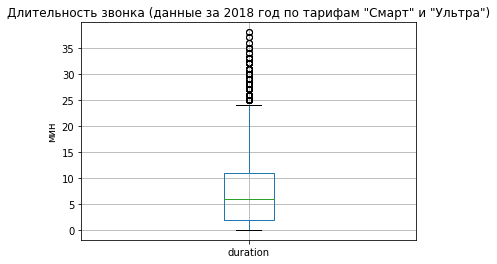

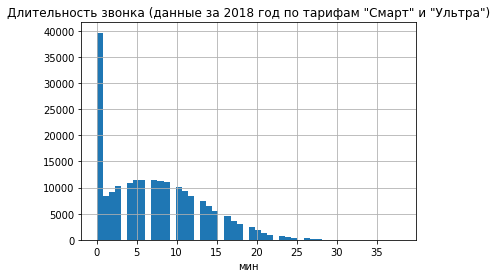

In [9]:
# проверим даты звонков на вхождение в исследуемый период
out_of_bounds = len(calls_data.query('(2019 <= call_date.dt.year) or (call_date.dt.year <= 2017)'))
if out_of_bounds == 0:
    print('Звонков вне исследуемого периода не обнаружено')
else:
    print(f'Обнаружено {out_of_bounds} звонков вне исследуемого периода:')
    display(calls_data.query('(2019 <= call_date.dt.year) or (call_date.dt.year <= 2017)'))

# посмотрим на распределение длительности звонков
explore_data(calls_data, 'calls_data', 'duration', 50)

Довольно красивое распределение, если бы не звонки с нулевой длительностью. Но, как мы уже описали выше, они имеют право на существование.

#### Датасет с данными об интернет-сессиях (`internet.csv`)

Интернет-сессий вне исследуемого периода не обнаружено


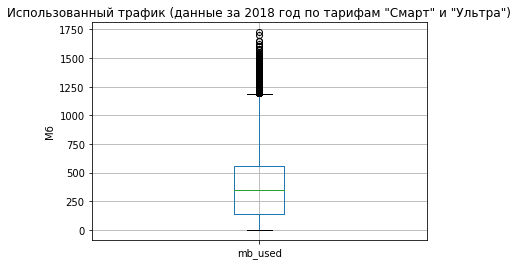

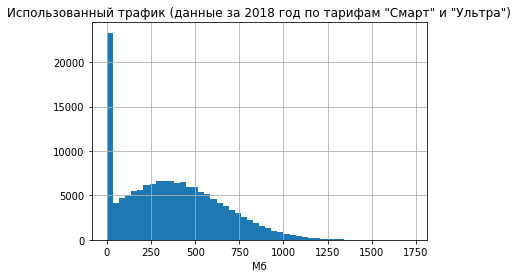

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null uint16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(2)
memory usage: 10.9 MB


None

In [10]:
# проверим даты сессий на вхождение в исследуемый период
out_of_bounds = len(internet_data.query('(2019 <= session_date.dt.year) or (session_date.dt.year <= 2017)'))
if out_of_bounds == 0:
    print('Интернет-сессий вне исследуемого периода не обнаружено')
else:
    print(f'Обнаружено {out_of_bounds} интернет-сессий вне исследуемого периода:')
    display(internet_data.query('(2019 <= session_date.dt.year) or (session_date.dt.year <= 2017)'))

# посмотрим на распределение длительности звонков
explore_data(internet_data, 'internet_data', 'mb_used', 50)

# удалим ненужный столбец
internet_data.drop(internet_data.columns[0], axis=1, inplace=True)

# посмотрим на результаты
display(internet_data.info(memory_usage='deep'))

Также видимо очень красивое распределение, которое портят нулевые сессии. По аналогии со звонками, мы не будем считать их ошибкой в данных. Нулевая сессия может отражать сбой в оборудовании, ошибку подключения и много другого.

#### Датасет с данными о сообщениях (`messages.csv`)

In [11]:
# проверим даты сообщений на вхождение в исследуемый период
out_of_bounds = len(messages_data.query('(2019 <= message_date.dt.year) or (message_date.dt.year <= 2017)'))
if out_of_bounds == 0:
    print('Сообщений вне исследуемого периода не обнаружено')
else:
    print(f'Обнаружено {out_of_bounds} Сообщений вне исследуемого периода:')
    display(messages_data.query('(2019 <= message_date.dt.year) or (message_date.dt.year <= 2017)'))

Сообщений вне исследуемого периода не обнаружено


Всё отлично, сообщений из прошлого и будущего к нам в датасет не попало

#### Датасет с данными о пользователях (`users.csv`)

Подключившихся вне исследуемого периода не обнаружено
Отключившихся вне исследуемого периода не обнаружено


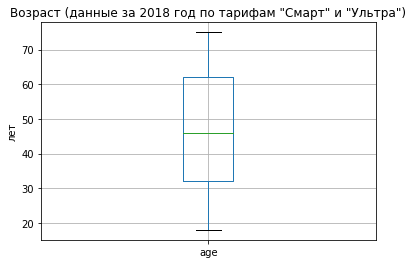

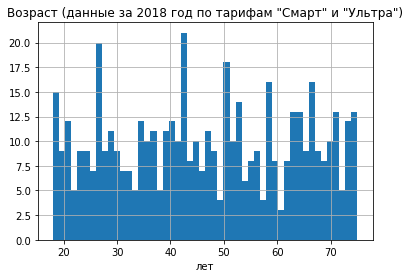

In [12]:
# проверим, нет ли подключившихся после 2018 года
out_of_bounds = len(users_data.query('reg_date.dt.year >= 2019'))
if out_of_bounds == 0:
    print('Подключившихся вне исследуемого периода не обнаружено')
else:
    print(f'Обнаружено {out_of_bounds} абонентов, подключившихся вне исследуемого периода:')
    display(users_data.query('reg_date.dt.year >= 2019'))

# проверим, нет ли расторгнувших договор до 2018 года
out_of_bounds = len(users_data.query('churn_date.dt.year <= 2017'))
if out_of_bounds == 0:
    print('Отключившихся вне исследуемого периода не обнаружено')
else:
    print(f'Обнаружено {out_of_bounds} абонентов, отключившихся вне исследуемого периода:')
    display(users_data.query('churn_date.dt.year <= 2017'))

# посмотрим на распределение длительности звонков
explore_data(users_data, 'users_data', 'age', 50)

Каких-то грубых ошибок здесь не видно, записей, не соответствующих исследуемому периоду не обнаружено.

In [13]:
# заполним пропуски первым января 2019 года
users_data = users_data.fillna(value={'churn_date':pd.to_datetime('2019-01-01', format='%Y-%m-%d')})

# проверим
display(users_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null uint16
age           500 non-null uint8
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 181.5 KB


None

Нами были исследованы данные на предмет следующих ошибок:
- Выбивающиеся значения, не характерные для данного параметра
- Выход значений даты за пределы исследуемого периода
Были найдены выбивающиеся значения для длительности звонка и интернет-сессии (нулевые, в количестве около 20%), но мы объяснили их наличие в наших данных.

Также были исправлены ошибки, обнаруженные ранее - пропуски в столбце с датой разрыва контракта (формально ошибкой не является, но нужно было заполнить пропуски), и лишний столбец в датасете `internet.csv`, дублирующий индекс данного датасета. Пропуски мы заполнили индикаторным значением - датой 1 января 2019, которая выходит за границы исследуемого периода, а лишний столбец успешно дропнули.

### Расчёт новых показателей для каждого пользователя

Нам необходимо посчитать следующие параметры:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

Для этого нам необходимо будет сделать следующее:

- в каждом датасете добавить столбец с месяцем
- сгруппировать датасеты по `user_id` и месяцу
- посчитать необходимые показатели
- объединить данные в общий датасет по столбцам `user_id` и месяц
- в объединённом датасете посчитать и добавить столбец с помесячной выручкой

#### Рассчитаем новые показатели

In [14]:
# извлекаем месяц и добавляем его в новый столбец
calls_data['month'] = calls_data['call_date'] - pd.to_timedelta(calls_data['call_date'].dt.day-1, unit='D')
messages_data['month'] = messages_data['message_date'] - pd.to_timedelta(messages_data['message_date'].dt.day-1, unit='D')
internet_data['month'] = internet_data['session_date'] - pd.to_timedelta(internet_data['session_date'].dt.day-1, unit='D')

# сгруппируем данные и перезапишем их в имеющиеся датасеты
calls_data = calls_data.pivot_table(index=['user_id', 'month'], aggfunc={'duration':'sum', 'id':'count'}).reset_index()
messages_data = messages_data.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'}).reset_index()
internet_data = internet_data.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':'sum'}).reset_index()

## перед объединением таблиц необходимо переименовать столбцы в некоторых датасетах и удалить лишние столбцы
# переименовываем столбцы `id` в их новое смысловое значение (количество звонков и количество сообщений)
calls_data = calls_data.rename({'id':'calls_count'}, axis=1)
messages_data = messages_data.rename({'id':'messages_count'}, axis=1)

# объединяем датасеты по столбцам `user_id` и `month`
merged_data = calls_data.merge(messages_data, left_on=['user_id', 'month'], right_on=['user_id', 'month'])
merged_data = merged_data.merge(internet_data, left_on=['user_id', 'month'], right_on=['user_id', 'month'])

# приклеим датасет `users.csv` по столбцу `user_id`
merged_data = merged_data.merge(users_data, left_on=['user_id'], right_on=['user_id'], how='outer')

# посчитаем помесячную выручку
def calc_monthly_take(row):
    tname = list(users_data[users_data['user_id'] == row['user_id']]['tariff'])[0]
    trf = tariffs_data[tariffs_data['tariff_name'] == tname]
    dur = row['duration']
    mbs = row['mb_used']
    msg = row['messages_count']
    fee = int(trf['rub_monthly_fee'])
    mlim = int(trf['minutes_included'])
    mblim = int(trf['mb_per_month_included'])
    msglim = int(trf['messages_included'])
    moverdraft = int(dur >= mlim)
    mboverdraft = int(mbs >= mblim)
    msgoverdraft = int(msg >= msglim)
    take = fee + int(trf['rub_per_minute'])*(dur - mlim)*moverdraft + int(trf['rub_per_gb'])/1024*(mbs-mblim)*mboverdraft + int()*(msg-msglim)*msgoverdraft
    return take

merged_data['take'] = merged_data.apply(calc_monthly_take, axis=1)

# посмотрим на новый датасет
display(merged_data.info(memory_usage='deep'))
display(merged_data.head())
display(merged_data.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 2747
Data columns (total 14 columns):
user_id           2748 non-null uint64
month             2667 non-null datetime64[ns]
duration          2667 non-null float64
calls_count       2667 non-null float64
messages_count    2667 non-null float64
mb_used           2667 non-null float64
age               2748 non-null uint8
churn_date        2748 non-null datetime64[ns]
city              2748 non-null object
first_name        2748 non-null object
last_name         2748 non-null object
reg_date          2748 non-null datetime64[ns]
tariff            2748 non-null object
take              2667 non-null float64
dtypes: datetime64[ns](3), float64(5), object(4), uint64(1), uint8(1)
memory usage: 1.1 MB


None

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,take
0,1000,2018-05-01,159.0,22.0,22.0,2256.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,2018-06-01,172.0,43.0,60.0,23257.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,2018-07-01,340.0,47.0,75.0,14016.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,2018-08-01,408.0,52.0,81.0,14070.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,2018-09-01,466.0,58.0,57.0,14581.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


,count,mean,std,min,25%,50%,75%,max
user_id,2748.0,1254.979985,146.034457,1000.0,1127.000000,1264.0000,1384.00,1499.000000
duration,2667.0,459.332208,237.551341,0.0,295.000000,450.0000,592.00,1673.000000
calls_count,2667.0,64.173228,32.621554,1.0,42.000000,63.0000,82.00,244.000000
messages_count,2667.0,45.216723,34.464757,1.0,19.000000,38.0000,63.00,224.000000
mb_used,2667.0,17210.265842,7251.922924,0.0,12551.000000,16925.0000,21358.50,49789.000000
age,2748.0,46.627001,16.473127,18.0,32.000000,47.0000,61.25,75.000000
take,2667.0,1447.175946,781.482466,550.0,633.105469,1475.1875,1950.00,6612.015625


In [15]:
print(f'Кол-во клиентов: {merged_data.user_id.nunique()}')

Кол-во клиентов: 500


При слиянии мы не потеряли клиентов, но для 81 пользователя у нас нет данных о расходах, и, соответственно, мы не можем посчитать выручку. Взглянем на этих клиентов:

In [16]:
# посмотрим на первые 5 значений выборки
display(merged_data[merged_data['take'].isnull()].head())

# оценим значения столбцов с датой подключения и датой отключения для этой выборки
display(merged_data[merged_data['take'].isnull()].loc[:,['churn_date', 'reg_date']].describe().T)

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,take
2667,1001,NaT,NaN,NaN,NaN,NaN,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,NaN
2668,1006,NaT,NaN,NaN,NaN,NaN,21,2019-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN
2669,1010,NaT,NaN,NaN,NaN,NaN,26,2019-01-01,Тюмень,Эдуард,Кононов,2018-08-05,smart,NaN
2670,1017,NaT,NaN,NaN,NaN,NaN,73,2019-01-01,Краснодар,Мария,Аленникова,2018-05-22,smart,NaN
2671,1024,NaT,NaN,NaN,NaN,NaN,73,2019-01-01,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,NaN


,count,unique,top,freq,first,last
churn_date,81,10,2019-01-01,72,2018-08-17,2019-01-01
reg_date,81,75,2018-08-25,2,2018-01-04,2018-12-25


Как видно, в эту выборку попали как действующие абоненты, так и отключившиеся в 2018 году. Подключились наши абоненты абсолютно все в 2018 году. Мы не можем точно сказать, по какой причине у нас отсутствуют данные об их расходах - ошибка биллинга или данные абоненты не пользовались связью, но мы можем быть уверены что в этот период у них списывалась абонентская плата. Поэтому для всех месяцев, в которые договор действовал, мы можем добавить записи для данного пользователя и в качестве выручки за месяц записать абонентскую плату по тарифу.

In [17]:
# создаём пустой датафрейм с аналогичной основному структурой столбцов
missed_data = pd.DataFrame(columns=merged_data.columns)

# записываем список пользователей, для которых у нас нет данных о расходах
missed_users = list(merged_data[merged_data['take'].isnull()]['user_id'].unique())

# добавляем новые строки в пустой датафрейм согласно описанному выше принципу
for i in missed_users:
    row = merged_data[merged_data['user_id'] == i]
    start = int(row['reg_date'].dt.month)
    tname = str(list(merged_data[merged_data['user_id'] == i]['tariff'])[0])
    tfee = float(list(tariffs_data[tariffs_data['tariff_name'] == tname]['rub_monthly_fee'])[0])
    if int(row['churn_date'].dt.year) > 2018:
        end = 12
    else:
        end = int(row['churn_date'].dt.month)
    mon = start
    while mon <= end:
        row['month'] = pd.to_datetime('2018-'+str(mon)+'-1', format='%Y-%m-%d')
        row['take'] = tfee
        missed_data = missed_data.append(row, ignore_index=True)
        mon += 1

# посмотрим на наш новый датасет
display(missed_data.sort_values(by='user_id'))
missed_data.info()

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,take
0,1001,2018-11-01,NaN,NaN,NaN,NaN,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,550.0
1,1001,2018-12-01,NaN,NaN,NaN,NaN,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,550.0
2,1006,2018-02-01,NaN,NaN,NaN,NaN,21,2019-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,550.0
3,1006,2018-03-01,NaN,NaN,NaN,NaN,21,2019-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,550.0
4,1006,2018-04-01,NaN,NaN,NaN,NaN,21,2019-01-01,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1494,2018-10-01,NaN,NaN,NaN,NaN,62,2019-01-01,Омск,Ренат,Андропов,2018-08-17,smart,550.0
519,1494,2018-11-01,NaN,NaN,NaN,NaN,62,2019-01-01,Омск,Ренат,Андропов,2018-08-17,smart,550.0
516,1494,2018-08-01,NaN,NaN,NaN,NaN,62,2019-01-01,Омск,Ренат,Андропов,2018-08-17,smart,550.0
517,1494,2018-09-01,NaN,NaN,NaN,NaN,62,2019-01-01,Омск,Ренат,Андропов,2018-08-17,smart,550.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 14 columns):
user_id           521 non-null object
month             521 non-null datetime64[ns]
duration          0 non-null float64
calls_count       0 non-null float64
messages_count    0 non-null float64
mb_used           0 non-null float64
age               521 non-null object
churn_date        521 non-null datetime64[ns]
city              521 non-null object
first_name        521 non-null object
last_name         521 non-null object
reg_date          521 non-null datetime64[ns]
tariff            521 non-null object
take              521 non-null float64
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 57.1+ KB


Таким образом 81 пользователь превращаются в 521 запись о ежемесячном расходе. Осталось дропнуть из основного датасета все записи с пропусками и приклеить к нему после этого наш новый датасет. И почему-то выручка у нас стала строкового типа, нужно привести её к числовому

In [18]:
# дропаем пропуски
merged_data.dropna(inplace=True)

# проверяем, что ушла ровно 81 запись
display(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 14 columns):
user_id           2667 non-null uint64
month             2667 non-null datetime64[ns]
duration          2667 non-null float64
calls_count       2667 non-null float64
messages_count    2667 non-null float64
mb_used           2667 non-null float64
age               2667 non-null uint8
churn_date        2667 non-null datetime64[ns]
city              2667 non-null object
first_name        2667 non-null object
last_name         2667 non-null object
reg_date          2667 non-null datetime64[ns]
tariff            2667 non-null object
take              2667 non-null float64
dtypes: datetime64[ns](3), float64(5), object(4), uint64(1), uint8(1)
memory usage: 294.3+ KB


None

Пропуски дропнулись корректно, приклеиваем новый датасет

In [19]:
# приклеиваем
merged_data = merged_data.append(missed_data, ignore_index=True)

# смотрим на результат
display(merged_data.head())
display(merged_data.info())

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,take
0,1000,2018-05-01,159.0,22.0,22.0,2256.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,2018-06-01,172.0,43.0,60.0,23257.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,2018-07-01,340.0,47.0,75.0,14016.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,2018-08-01,408.0,52.0,81.0,14070.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,2018-09-01,466.0,58.0,57.0,14581.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 14 columns):
user_id           3188 non-null object
month             3188 non-null datetime64[ns]
duration          2667 non-null float64
calls_count       2667 non-null float64
messages_count    2667 non-null float64
mb_used           2667 non-null float64
age               3188 non-null object
churn_date        3188 non-null datetime64[ns]
city              3188 non-null object
first_name        3188 non-null object
last_name         3188 non-null object
reg_date          3188 non-null datetime64[ns]
tariff            3188 non-null object
take              3188 non-null float64
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 348.8+ KB


None

In [20]:
merged_data['take'].describe()

count    3188.000000
mean     1400.680128
std       775.115485
min       550.000000
25%       550.000000
50%      1414.285156
75%      1950.000000
max      6612.015625
Name: take, dtype: float64

Расчёты проведены и данные объединились корректно, можно продолжать. Можно заметить, что типы данных опять стали избыточными по некоторым столбцам.

#### Приведём данные к нужным типам

In [21]:
# составим словарь с новыми типами для автоматизации
new_types = {
    'user_id':'uint16',
    'month':'uint8',
    'calls_count':'uint8',
    'messsages_count':'uint8',
    'take':'float32'}

# приводим типы
for i in new_types.keys():
    try:
        merged_data[i] = merged_data[i].astype(new_types[i])
    except:
        print(f'Проверь значения в столбце {i}')
        
# посмотрим на результат работы
display(merged_data.info(memory_usage='deep'))
display(merged_data.head())
display(merged_data.describe().T)

Проверь значения в столбце month
Проверь значения в столбце calls_count
Проверь значения в столбце messsages_count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 14 columns):
user_id           3188 non-null uint16
month             3188 non-null datetime64[ns]
duration          2667 non-null float64
calls_count       2667 non-null float64
messages_count    2667 non-null float64
mb_used           2667 non-null float64
age               3188 non-null object
churn_date        3188 non-null datetime64[ns]
city              3188 non-null object
first_name        3188 non-null object
last_name         3188 non-null object
reg_date          3188 non-null datetime64[ns]
tariff            3188 non-null object
take              3188 non-null float32
dtypes: datetime64[ns](3), float32(1), float64(4), object(5), uint16(1)
memory usage: 1.4 MB


None

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,take
0,1000,2018-05-01,159.0,22.0,22.0,2256.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,2018-06-01,172.0,43.0,60.0,23257.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,2018-07-01,340.0,47.0,75.0,14016.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,2018-08-01,408.0,52.0,81.0,14070.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,2018-09-01,466.0,58.0,57.0,14581.0,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


,count,mean,std,min,25%,50%,75%,max
user_id,3188.0,1251.521957,144.537868,1000.0,1126.0,1253.000000,1378.0,1499.000000
duration,2667.0,459.332208,237.551341,0.0,295.0,450.000000,592.0,1673.000000
calls_count,2667.0,64.173228,32.621554,1.0,42.0,63.000000,82.0,244.000000
messages_count,2667.0,45.216723,34.464757,1.0,19.0,38.000000,63.0,224.000000
mb_used,2667.0,17210.265842,7251.922924,0.0,12551.0,16925.000000,21358.5,49789.000000
take,3188.0,1400.680176,775.115479,550.0,550.0,1414.285156,1950.0,6612.015625


Нами были рассчитаны новые помесячные показатели для каждого абонента:

- Количество сделанных звонков и израсходованных минут разговора
- Количество отправленный сообщений
- Объём израсходованного интернет-трафика
- Выручка с каждого пользователя

Старые и новые показатели были сгруппированы и объединены в общий датасет для удобства работы. Данные в общем датасете были приведены к необходимым типам.

### Вывод по разделу "Подготовка данных"

В данном разделе мы выполнили полный спектр операций, необходимых для подготовки данных:

- Привели данные к нужным типам, за счёт чего смогли сэкономить довольно большой объём памяти
- Нашли и устранили ошибки в данных (пропуски, лишние столбцы)
- Рассчитали новые параметры, которые требуются для дальнейшей работы

Данные готовы к анализу, самое время к нему приступить.

## Анализ данных

В данном разделе нам предстоит описать поведение клиентов, исходя из выборки. Для этого нам необходимо для каждого тарифного плана ответить на следующие вопросы:

- Сколько минут разговора требуется пользователям ежемесячно?
- Сколько сообщений требуется пользователям ежемесячно?
- Какой объём интернет-трафика требуется пользователям ежемесячно?

А также вопрос, которого нет в задании, но без ответа на который нельзя будет ответить на основной вопрос нашего исследования:

- Какую выручку приносят пользователи каждого из тарифов?

а также посчитать среднее, дисперсию и стандартное отклонение для каждого показателя.
После этого необходимо будет построить гистограммы и описать распределения.

### Оценим ежемесячные потребности

Оценим ежемесячные потребности пользователей тарифа ultra


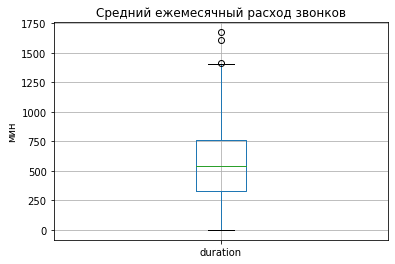

Потребности большинства пользователей тарифа ultra не превышают 1403 мин в месяц 



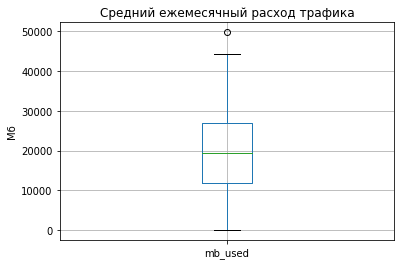

Потребности большинства пользователей тарифа ultra не превышают 49261 Мб в месяц 



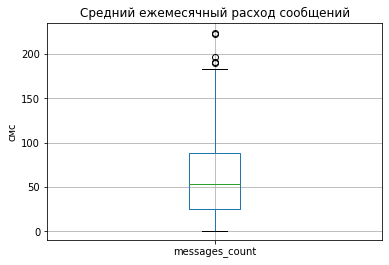

Потребности большинства пользователей тарифа ultra не превышают 185 смс в месяц 

Оценим ежемесячные потребности пользователей тарифа smart


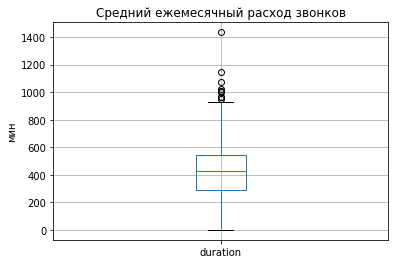

Потребности большинства пользователей тарифа smart не превышают 936 мин в месяц 



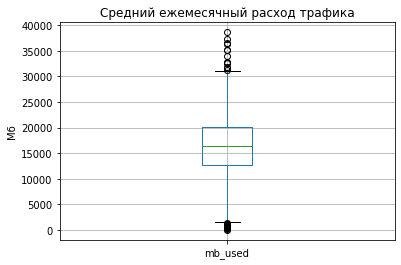

Потребности большинства пользователей тарифа smart не превышают 31210 Мб в месяц 



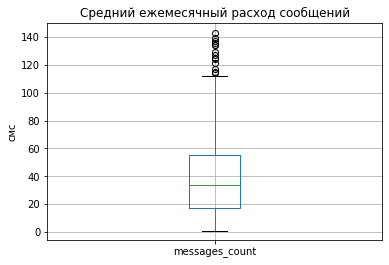

Потребности большинства пользователей тарифа smart не превышают 112 смс в месяц 



In [22]:
# создадим словарь с наименованиями и единицами измерений для всех параметров
labels={
    'duration':['Средний ежемесячный расход звонков', 'мин'],
    'mb_used':['Средний ежемесячный расход трафика','Мб'],
    'messages_count':['Средний ежемесячный расход сообщений','смс'],
    'take':['Средняя выручка','₽']}

# оцениваем ежемесячные потребности в услугах пользователей тарифов
for i in list(merged_data['tariff'].unique()):
    print(f'Оценим ежемесячные потребности пользователей тарифа {i}')
    for j in ['duration', 'mb_used', 'messages_count']:
        unit_name=labels[j][1]
        ax=merged_data[merged_data['tariff'] == i].boxplot(column=j)
        ax.set_title(labels[j][0])
        ax.set_ylabel(unit_name)
        plt.show()
        q1=merged_data[merged_data['tariff'] == i][j].describe()[4]
        q3=merged_data[merged_data['tariff'] == i][j].describe()[6]
        r_margin=round(q3 + 1.5*(q3-q1))
        print(f'Потребности большинства пользователей тарифа {i} не превышают {r_margin} {unit_name} в месяц','\n')

### Посчитаем показатели распределения, построим гистограммы и опишем распределение

Изучим показатели по тарифу ultra


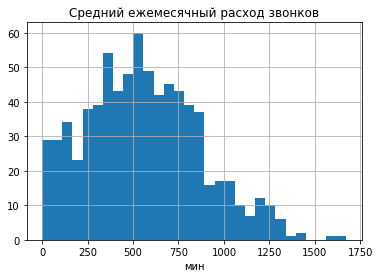

Средний ежемесячный расход звонков имеет среднее значение 556.86 мин
Средний ежемесячный расход звонков имеет дисперсию 97129.08 мин
Средний ежемесячный расход звонков имеет стандартное отклонение 311.66 мин


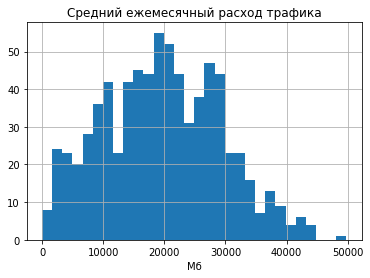

Средний ежемесячный расход трафика имеет среднее значение 19614.59 Мб
Средний ежемесячный расход трафика имеет дисперсию 92771221.73 Мб
Средний ежемесячный расход трафика имеет стандартное отклонение 9631.78 Мб


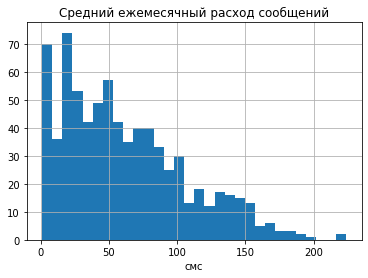

Средний ежемесячный расход сообщений имеет среднее значение 61.64 смс
Средний ежемесячный расход сообщений имеет дисперсию 2005.88 смс
Средний ежемесячный расход сообщений имеет стандартное отклонение 44.79 смс


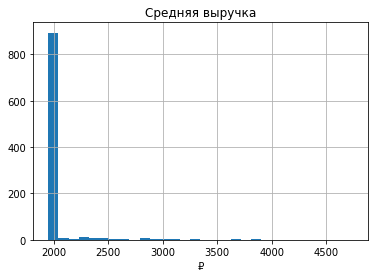

Средняя выручка имеет среднее значение 2019.67 ₽
Средняя выручка имеет дисперсию 77652.2 ₽
Средняя выручка имеет стандартное отклонение 278.66 ₽


Изучим показатели по тарифу smart


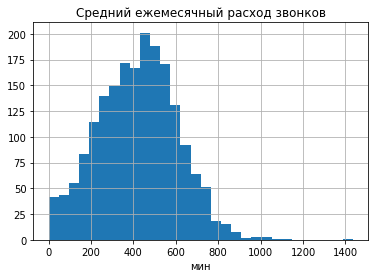

Средний ежемесячный расход звонков имеет среднее значение 421.03 мин
Средний ежемесячный расход звонков имеет дисперсию 35217.7 мин
Средний ежемесячный расход звонков имеет стандартное отклонение 187.66 мин


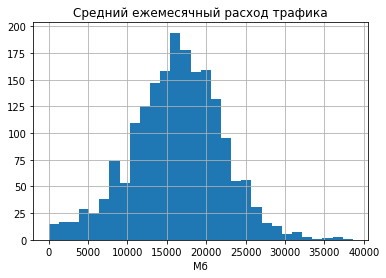

Средний ежемесячный расход трафика имеет среднее значение 16266.11 Мб
Средний ежемесячный расход трафика имеет дисперсию 33622866.61 Мб
Средний ежемесячный расход трафика имеет стандартное отклонение 5798.52 Мб


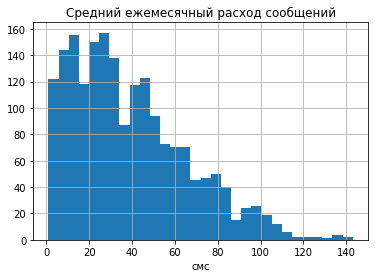

Средний ежемесячный расход сообщений имеет среднее значение 38.77 смс
Средний ежемесячный расход сообщений имеет дисперсию 718.43 смс
Средний ежемесячный расход сообщений имеет стандартное отклонение 26.8 смс


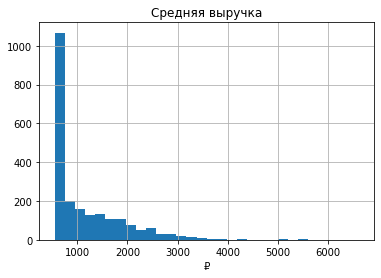

Средняя выручка имеет среднее значение 1125.95 ₽
Средняя выручка имеет дисперсию 587190.2 ₽
Средняя выручка имеет стандартное отклонение 766.28 ₽




In [23]:
# выведем гистограммы и посчитаем основные показатели распределения
for i in list(merged_data['tariff'].unique()):
    print(f'Изучим показатели по тарифу {i}')
    for j in ['duration', 'mb_used', 'messages_count', 'take']:
        mean_value = round(np.mean(merged_data[merged_data['tariff'] == i][j]), 2)
        variance = round(np.var(merged_data[merged_data['tariff'] == i][j]), 2)
        std_dev = round(np.std(merged_data[merged_data['tariff'] == i][j]), 2)
        ax=merged_data[merged_data['tariff'] == i][j].hist(bins=30)
        ax.set_title(labels[j][0])
        ax.set_xlabel(labels[j][1])
        plt.show()
        print(labels[j][0]+' имеет среднее значение', mean_value, labels[j][1])
        print(labels[j][0]+' имеет дисперсию', variance, labels[j][1])
        print(labels[j][0]+' имеет стандартное отклонение', std_dev, labels[j][1])
    print('\n')

Опишем распределения.

Для тарифа "Ультра":
- Средний ежемесячный расход - распределение имеет положительную скошенность
- Средний ежемесячный расход трафика - в целом можно аппроксимировать распределение нормальным
- Средний ежемесячный расход сообщений - наиболее близким к полученной картине является экспоненциальное распределение
- Средняя выручка - распределение не совпадает с каким-либо из известных. Основная часть данных имеет значение, равное абонентской плате (что логично, т.к. ранее мы установили, что большая часть пользователей тарифа не выходит за лимиты, входящие в стандартный пакет)

Для тарифа "Смарт":
- Средний ежемесячный расход - картина похожа на распределение Пуассона
- Средний ежемесячный расход трафика - практически идеальное нормальное распределение
- Средний ежемесячный расход сообщений - наиболее близким к полученной картине является экспоненциальное распределение
- Средняя выручка - довольно похоже на экспоненциальное распределение с выдающимся пиком при значении, равно абонентской плате по тарифу

### Вывод по разделу "Анализ данных"

Исходя из полученных данных можно сделать следюущие заключения:

- Более 25% пользователей тарифа `smart` имеют перерасход по количеству звонков и смс
- Более 50% пользователей тарифа `smart` имеют перерасход по использованному трафику
- Пользователи тарифа `ultra` из нашей выборки никогда не расходуют пакет минут, смс и гигабайт полностью. Большинство пользователей не используют даже половину пакета минут, и не расходут больше 20% от пакета смс
- Не более 25% пользователей тарифа `ultra` имеют перерасход по использованному трафику

## Проверка гипотез

### Гипотеза №1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Учитывая, что мы ранее увидели, что распределение выручки не соответствует нормальному, мы не можем применить для проверки этой гипотезы критерий Стьюдента. Поэтому, основываясь на картине распределения выручки, мы будем проверять данную гипотезу прямым сравнением средних значений.

**Сформулируем гипотезы:**

H<sub>0</sub>: средние значения выручки пользователей тарифов "Ультра" и "Смарт" равны<br>
H<sub>1</sub>: средние значения выручки пользователей тарифов "Ультра" и "Смарт" различаются

In [24]:
# сформируем выборки
sample_1 = merged_data[merged_data['tariff'] == 'smart']['take']
sample_2 = merged_data[merged_data['tariff'] == 'ultra']['take']

# считаем средние
smart_take_mean = sample_1.mean()
ultra_take_mean = sample_2.mean()

# выводим значения на экран
print(f'Средняя выручка пользователей тарифа "smart" составляет {smart_take_mean}')
print(f'Средняя выручка пользователей тарифа "ultra" составляет {ultra_take_mean}')

Средняя выручка пользователей тарифа "smart" составляет 1125.9456787109375
Средняя выручка пользователей тарифа "ultra" составляет 2019.6734619140625


Гипотеза №1 <b>подтверждена</b> - средняя выручка пользователей тарифов "Ультра" и "Смарт" <b>различаются</b>

**Предположим, что данные были распределены нормально и мы могли бы применить критерий стьюдента для проверки данной гипотезы:**

In [25]:
# выборки не изменились, используем те же, что и ранее
# значение уровня статистической значимости пинимаем равным 0,05
alpha = 0.05

# как мы увидели ранее, дисперсии наших выборов значительно различаются, поэтому параметр equal_var будет иметь значение False
# проведём тест
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

# выведем результаты теста
print('p-значение:', results.pvalue)

# не забываем, что из условия задачи нам не важно, в какую сторону отличаются средние, поэтому оценка будет двусторонней
if results.pvalue < alpha / 2:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Проверка гипотезы с помощью критерия Стьюдента дала схожий ответ, что и простое сравнение средних. Это вполне объяснимо - наши средние отличаются почти в 2 раза, а дисперсии выборок - в 7,6 раза

### Гипотеза №2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки данной гипотезы сначала нужно изучить распределение параметров в выборке.

**Сформулируем гипотезы:**

H<sub>0</sub>: средние значения выручки пользователей из Москвы и из других регионов равны<br>
H<sub>1</sub>: средние значения выручки пользователей из Москвы и из других регионов различаются
</div>

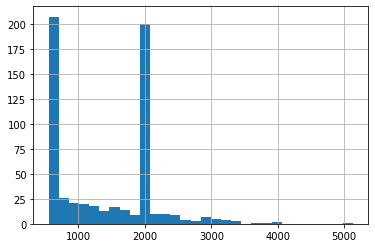

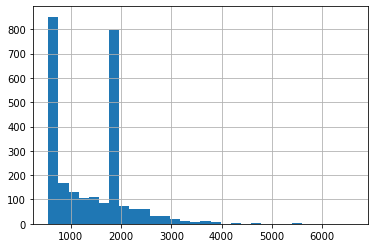

In [26]:
# сформируем выборки
sample_1 = merged_data[merged_data['city'] == 'Москва']['take']
sample_2 = merged_data[merged_data['city'] != 'Москва']['take']

# посмотрим на распределения
sample_1.hist(bins=30)
plt.show()
sample_2.hist(bins=30)
plt.show()

Распределение даже близко не похоже на нормальное. Критерий Стьюдента использовать нельзя, придётся опять же напрямую сравнивать средние значения выборок.

In [27]:
# считаем средние
moscow_take_mean = sample_1.mean()
regions_take_mean = sample_2.mean()

# выводим значения на экран
print(f'Средняя выручка пользователей из Москвы составляет {moscow_take_mean}')
print(f'Средняя выручка пользователей из регионов составляет {regions_take_mean}')

Средняя выручка пользователей из Москвы составляет 1387.8372802734375
Средняя выручка пользователей из регионов составляет 1403.6881103515625


Гипотеза №2 <b>подтверждена</b> - разница в средней выручке пользователей из Москвы и из Других регионов <b>присутствует</b>, и составляет 4,96%

**Опять же, предположим, что данные распределены нормально и попробуем провести t-test**

In [28]:
# выборки не изменились, используем те же, что и ранее
# сначала сравним дисперсии выборок
sample_1_var = round(np.var(sample_1), 2)
sample_2_var = round(np.var(sample_2), 2)
print(f'Выборки 1 и 2 имеют дисперсии {sample_1_var} и {sample_2_var}, соответственно')

# значение уровня статистической значимости пинимаем равным 0,05
alpha = 0.05

# как мы увидели ранее, дисперсии наших выборов значительно различаются, поэтому параметр equal_var будет иметь значение False
# проведём тест
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

# выведем результаты теста
print('p-значение:', results.pvalue)

# не забываем, что из условия задачи нам не важно, в какую сторону отличаются средние, поэтому оценка будет двусторонней
if results.pvalue < alpha / 2:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Выборки 1 и 2 имеют дисперсии 592135.625 и 602554.0625, соответственно
p-значение: 0.6492319455259719
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы №2 с помощью критерия Стьюдента показала, что разница в средних выручках хоть и присутствует, но не является статистически значимой, поэтому гипотезу №2 можно опровергнуть.

### Вывод по разделу "Проверка гипотез" 

В результате проверки гипотез мы <b>подтвердили</b> гипотезу №1 и выяснили, что средняя выручка пользователей представленных тарифов <b>различается</b>. Гипотезу №2 мы также <b>подтвердили</b> и выяснили, что средняя выручка пользователей из Москвы хоть и незначительно, но выше средней выручки по всем остальным регионам (на 4,96%).

Как мы увидели ранее, исследуемые выборки не были распределены нормально, но мы всё же провели дополнительную проверку гипотез и с помощью критерия Стьюдента. Проверка показала следующее: гипотезу №1 мы также подтвердили - выборки настолько разные, что говорить о равенстве средних не приходится. А вот при проверке гипотезы №2 мы вынуждены признать, что отличие средних хоть и присутствуют, но не является статистически значимым при критическом уровне значимости 5%

## Общий вывод

Исходя из результатов проделанной работы, мы можем дать аргументированный ответ на поставленный в начале проекта вопрос "Какой тариф лучше?"

Для абонентов лучше тариф "Смарт", т.к. позволяет пользоваться сотовой связью с минимальными расходами, даже с учётом того, что при использовании данного тарифа часто возникают перерасходы по пакетам услуг.

Для бизнеса лучше тариф "Ультра", т.к. средняя выручка по данному тарифу на 68,1% выше, чем по тарифу "Смарт". 

С учётом того, что как мы установили, средняя выручка для Москвы чуть больше, чем для регионов, имеет смысл вложить максимальный рекламный бюджет в продвижение имеенно этого тарифа.